# Aggregate idiom usage over time

### What is this?
This is a script which generates graphs of idiom usage over time. The data is taken from `/data-commits/`. The structure should be as follows

```
/data-commits/
        2018-05
        2018-11
        ... 
        (for any number of time periods as you want)
```

Consult the README for information on how to generate this data.

You can change which idioms to generate graphs for using the following variable. The names can be found in the `idioms` OrderedDict in the cell below it.



In [5]:
idioms_to_look_for = ["List comprehension", "with", "\_\_repr\_\_ and \_\_str\_\_", "enumerate", "finally", "format"]


In [6]:
import argparse
import csv
import sys
import os
import glob
import math
import statistics
import string

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict 
from collections import OrderedDict

idioms = OrderedDict([
    ("List comprehension",         [1, 1, "counters.ListComp", "listcomp"]),
    ("Dict comprehension",         [1, 1, "counters.DictCompargs", "dictcomp"]),
    ("Generator expression",       [1, 1, "counters.GeneratorExpargs", "genexp"]),
    ("Decorator",                  [0, 1, "counters.Namedecorator_list", "decorator"]),
    ("Simple magic methods",       [0, 0, "MagicMethods.level1", None]),
    ("Intermediate magic methods", [0, 0, "MagicMethods.level2", None]),
    ("Advanced magic methods",     [0, 0, "MagicMethods.level3", "magic"]),
    ("finally",                    [0, 1, "counters.Exprfinalbody", "finally"]),
    ("with",                       [0, 1, "counters.Withbody", "with"]),
    ("enumerate",                  [0, 1, "counters.enumerate", "enumerate"]),
    ("yield",                      [1, 0, "counters.Yield", "yield"]),
    ("lambda",                     [1, 0, "counters.Lambdaargs", "lambda"]),
    ("collections.defaultdict",    [1, 1, "counters.defaultdict", "defaultdict"]),
    ("collections.namedtuple",     [0, 1, "counters.namedtuple", "namedtuple"]),
    ("collections.deque",          [1, 1, "counters.deque", "deque"]),
    ("heapq",          [1, 1, "counters.heapq", "heapq"]),
    ("collections.Counter",        [0, 1, "counters.Counter", "counter"]),
    ("pprint.pprint",              [0, 1, "counters.pprint", "pprint"]),
    ("@classmethod",               [0, 1, "counters.classmethod", "classmethod"]),
    ("@staticmethod",              [0, 1, "counters.staticmethod", "staticmethod"]),
    ("@property",              [0, 1, "counters.property", "property"]),
    ("zip",                        [1, 1, "counters.zip", "zip"]),
    ("itertools",                  [1, 1, "itertools", "itertools"]),
    ("functools.total\\_ordering,", [0, 1, "counters.total_ordering", "ordering"]),
    ("\_\_repr\_\_ and \_\_str\_\_", [0, 1, "ReprStrs.level1", "reprstr"]),
    ("pprint", [0, 1, "counters.pprint", "pprint"]),
    ("format", [0, 1, "counters.format", "format"]),
    ("join", [0, 1, "counters.join", "join"]),
])
itertools = [
  "counters.izip_longest",
  "counters.zip_longest",
  "counters.starmap",
  "counters.tes",
  "counters.groupby",
]


In [7]:
all_stats = OrderedDict()
dirs = sorted(os.listdir('data-commits'))
for dir_ in dirs:
    allData = OrderedDict()
    idiomStats = OrderedDict()
    headers = set()
    skipHeaders = 8

    for project in sorted(glob.glob(os.path.join("data-commits", dir_, '*'))):
        datafile = os.path.join(project, "global.csv")
        if os.path.exists(datafile):
            with open(datafile, 'r') as csv_in:
                pName = os.path.basename(project)
                csvreader = csv.reader(csv_in, delimiter=',')
                headerRow = next(csvreader)[skipHeaders:]
                dataRow = next(csvreader)
                data = {}
                for i, header in enumerate(headerRow):
                    headers.add(header)
                    data[header] = dataRow[i+skipHeaders]
                allData[pName] = data

    headers.add("itertools")
    for header in sorted(headers):
        stats = {"present": 0, "count": 0}
        for project, data in sorted(allData.items()):
            # add up itertools stats
            data['itertools'] = 0
            for tool in itertools:
                if tool in data:
                    data['itertools'] += int(data[tool])
            # aggregate stats
            if header in data and int(data[header]) > 0:
                stats["present"] += 1
                stats["count"] += int(data[header])
        idiomStats[header] = stats

    all_stats[dir_] = idiomStats


['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [4365, 4584, 4780, 5065, 5171, 5419, 5656]


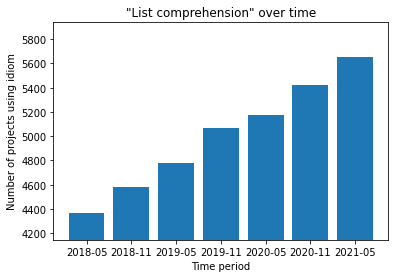

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [48, 58, 61, 71, 74, 92, 101]


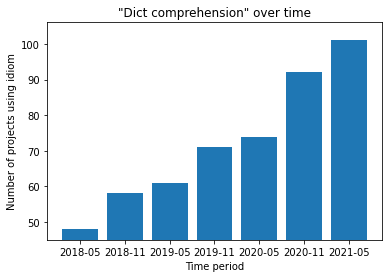

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [2091, 2272, 2336, 2453, 2474, 2568, 2712]


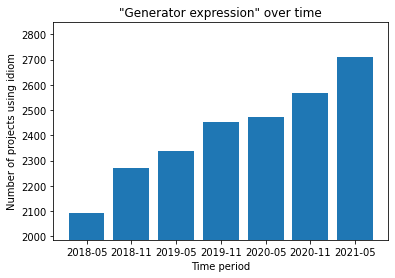

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [4536, 4937, 5306, 5648, 5976, 6622, 6826]


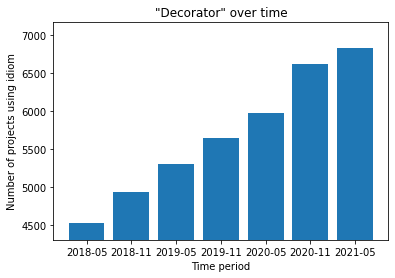

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [2101, 2155, 2226, 2310, 2345, 2426, 2518]


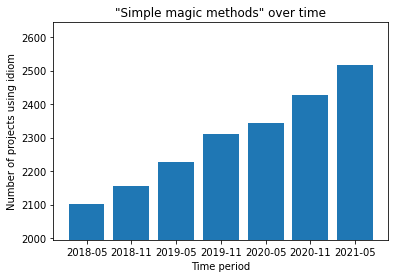

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [449, 431, 439, 457, 458, 499, 514]


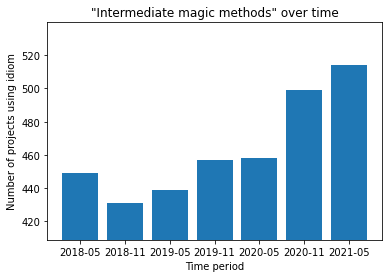

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [95, 93, 104, 110, 120, 135, 134]


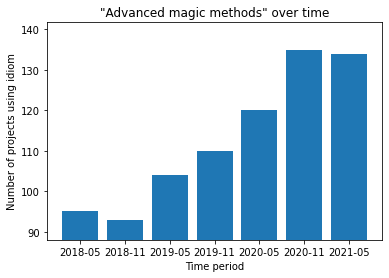

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [157, 208, 224, 220, 230, 237, 259]


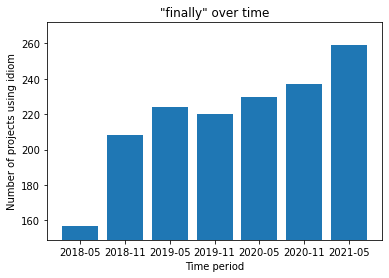

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [2521, 2978, 3498, 3786, 4160, 4533, 4805]


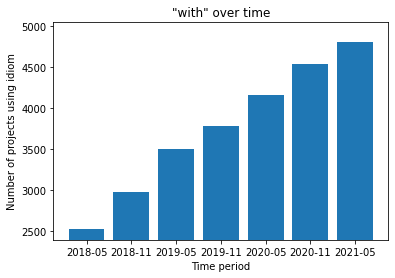

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [1118, 1170, 1211, 1266, 1264, 1337, 1398]


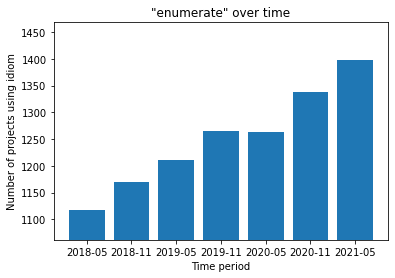

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [509, 520, 537, 594, 595, 593, 591]


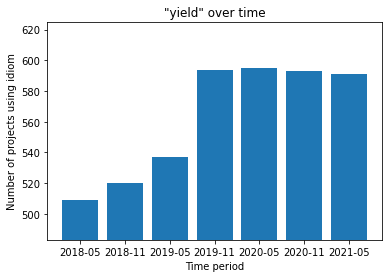

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [75165, 3761, 3973, 4346, 4627, 5106, 5262]


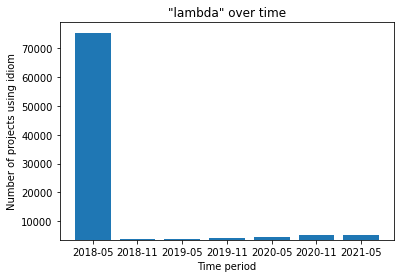

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [110, 118, 121, 149, 153, 163, 185]


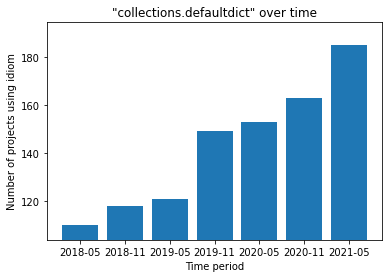

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [53, 64, 76, 88, 87, 87, 87]


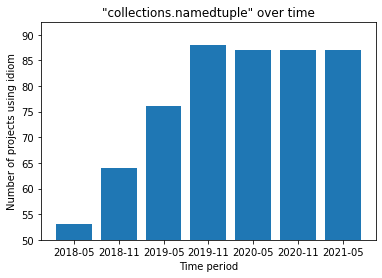

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [11, 11, 11, 11, 13, 15, 15]


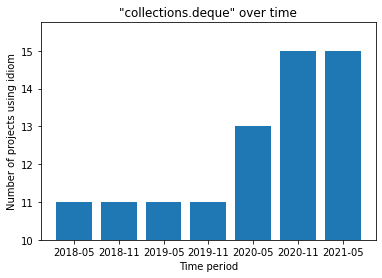

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [7, 7, 7, 7, 7, 8, 8]


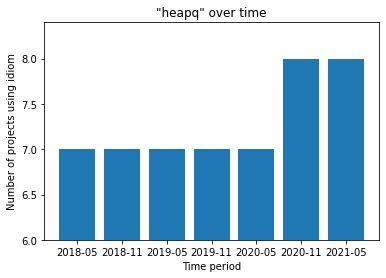

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [2, 6, 12, 15, 18, 18, 17]


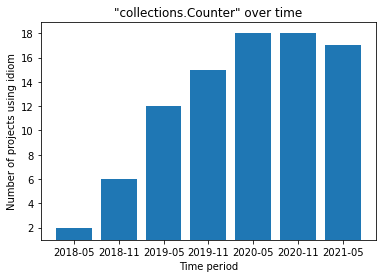

['2018-05', '2018-11', '2019-05', '2019-11', '2020-05', '2020-11', '2021-05'] [98, 98, 98, 98, 99, 99, 100, 100, 102, 102, 102, 102, 102, 102]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [9]:
%matplotlib inline

x = sorted(list(all_stats.keys()))
idiom_to_ys = defaultdict(list)
idiom_to_realname = {idioms.get(y)[2]: y for y in idioms.keys()}

for period in sorted(list(all_stats.keys())):
    # for name, meta in idioms.items():
    for idiom in idioms.keys():
        idiom = idioms.get(idiom)[2]
        if all_stats[period].get(idiom) is not None:
            idiom_to_ys[idiom].append(all_stats[period][idiom]['count'])
        else:
            idiom_to_ys[idiom].append(None)

for idiom in idiom_to_ys:
    if len(x) != len(idiom_to_ys[idiom]):
        continue
    plt.bar(x, idiom_to_ys[idiom])
    plt.autoscale(enable=True, axis='y')
    plt.ylim(ymin=int(min(idiom_to_ys[idiom]) - 0.05*min(idiom_to_ys[idiom])))
    name = idiom_to_realname.get(idiom).replace('\\','')
    plt.title(f"\"{name}\" over time")
    plt.xlabel("Time period")
    plt.ylabel("Number of projects using idiom")

    # plt.legend([y.replace('\\_','') for y in idioms_to_look_for], title="Idioms", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
